<a href="https://colab.research.google.com/github/CateS0908/Ejercicio-de-Regresi-n-1/blob/main/Ejercicio_de_Regresi%C3%B3n_1_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Descripción del problema:** Supongamos que trabajas en una empresa que desea predecir el precio de venta de casas en función de varias características. Tienes un conjunto de datos con información sobre las casas, incluyendo el tamaño de la casa (en pies cuadrados), el número de habitaciones, el número de baños y la antigüedad de la casa (en años). Tu tarea es construir un modelo de regresión lineal que pueda predecir el precio de venta de una casa dada.

In [ ]:
# carga del DataFrame
import pandas as pd
url = 'https://drive.google.com/uc?id=1NHa3WmN3tOFfZGKdNIJgZ1dP9n84WO8y&export=download'
df = pd.read_csv(url)
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


**Instrucciones:**

1. **Carga de datos:** Descarga el archivo de datos house_prices.csv que contiene las siguientes columnas:


SqFt: Tamaño de la casa en pies cuadrados.


Bedrooms: Número de habitaciones.


Bathrooms: Número de baños.


price: Precio de venta de la casa.

In [ ]:
df.tail()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West
127,128,124600,2250,3,3,4,No,North


In [ ]:
df.info() # verifico tipos de datos y su completitud

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [ ]:
df.describe().round(3)

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000,128.000,128.000,128.000,128.000,128.000
mean,64.500,130427.344,2000.938,3.023,2.445,2.578
std,37.094,26868.770,211.572,0.726,0.514,1.069
min,1.000,69100.000,1450.000,2.000,2.000,1.000
25%,32.750,111325.000,1880.000,3.000,2.000,2.000
50%,64.500,125950.000,2000.000,3.000,2.000,3.000
75%,96.250,148250.000,2140.000,3.000,3.000,3.000
max,128.000,211200.000,2590.000,5.000,4.000,6.000


2. **Exploración de datos:** Realiza un análisis exploratorio de los datos para entender su estructura y detectar posibles problemas como valores nulos o outliers.

In [ ]:
df.duplicated().sum() # verifico si hay presencia de duplicados

0

In [ ]:
df.isnull().sum() # verifico si hay datos nulos

,0
Home,0
Price,0
SqFt,0
Bedrooms,0
Bathrooms,0
Offers,0
Brick,0
Neighborhood,0


No hay presencia de datos nulos.

## Valores únicos

In [ ]:
df['Home'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128])

In [ ]:
df['Price'].unique()

array([114300, 114200, 114800,  94700, 119800, 114600, 151600, 150700,
       119200, 104000, 132500, 123000, 102600, 126300, 176800, 145800,
       147100,  83600, 111400, 167200, 116200, 113800,  91700, 106100,
       156400, 149300, 137000,  99300,  69100, 188000, 182000, 112300,
       135000, 139600, 117800, 117100, 117500, 147000, 131300, 108200,
       106600, 133600, 105600, 154000, 166500, 103200, 129800,  90300,
       115900, 107500, 151100,  91100, 117400, 130800,  81300, 125700,
       140900, 152300, 138100, 155400, 180900, 100900, 161300, 120500,
       130300, 111100, 126200, 151900,  93600, 165600, 166700, 157600,
       107300, 144200, 106900, 176500, 121300, 143600, 143400, 184300,
       164800, 147700,  90500, 188300, 102700, 172500, 127700,  97800,
       143100, 116500, 142600, 157100, 160600, 152500, 133300, 126800,
       145500, 171000, 123100, 136800, 211200,  82300, 146900, 108500,
       134000, 117000, 108700, 111600, 114900, 123600, 115700, 124500,
      

In [ ]:
df['SqFt'].unique()

array([1790, 2030, 1740, 1980, 2130, 1780, 1830, 2160, 2110, 1730, 1870,
       1910, 2150, 2590, 2190, 1990, 1700, 1920, 2000, 1690, 1820, 2210,
       2290, 1600, 2040, 2250, 1930, 2280, 2080, 1880, 2420, 1720, 1560,
       1840, 1940, 1810, 2050, 2100, 1860, 1650, 2240, 2090, 2200, 1610,
       2220, 1450, 2140, 1950, 1900, 2410, 1520, 2010, 1970, 2440, 2060,
       2260, 2530, 1890, 1710, 2070, 2020])

In [ ]:
df['Bedrooms'].unique()

array([2, 4, 3, 5])

In [ ]:
df['Bathrooms'].unique()

array([2, 3, 4])

In [ ]:
df['Offers'].unique()

array([2, 3, 1, 4, 5, 6])

In [ ]:
df['Brick'].unique() #Construcción en ladrillo

array(['No', 'Yes'], dtype=object)

In [ ]:
df['Neighborhood'].unique()

array(['East', 'North', 'West'], dtype=object)

No se evidencia presencia de datos categóricos mal codificados, ni tampoco presencia de datos atípicos que puedan representar un inconveniente.

3. **Preparación de datos:** Divide los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%).

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


X = df.drop(columns=['Price'])
y = df['Price']

#Preparación de datos: Divide los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%).
# Dividir los datos en conjuntos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 58)

#Definir las columnas numéricas y categóricas.

numeric_features = ['Home', 'SqFt', 'Bedrooms','Bathrooms', 'Offers']
categorical_features = ['Neighborhood', 'Brick']


# ordenar la categoría Neighborhood y Brick
orden_neighborhood = ['East', 'North', 'West']
orden_brick = ['Yes', 'No']

# Crear transformadores para cada subconjunto de columnas

numeric_transformer = Pipeline(steps= [
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories= [orden_neighborhood, orden_brick], handle_unknown='use_encoded_value', unknown_value=-1))

])

# Crear un ColumnTransformer, es decir transforma los respectivos subconjuntos de columnas.
preprocessor = ColumnTransformer(transformers= [
    ('numericas', numeric_transformer, numeric_features),
    ('categoricas', categorical_transformer, categorical_features)
])

# Entrenamiento del modelo: Entrena un modelo de regresión lineal utilizando los datos de entrenamiento.
# Crear y entrenar el modelo de regresión lineal
# Crear el pipeline que incluye el preprocesador y el modelo
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])


In [ ]:

# Ajustar el Pipeline a los datos de entrenamiento
model_pipeline.fit(X_train, y_train)

# Realizar predicciones
y_pred = model_pipeline.predict(X_test)

In [ ]:
# Evaluación del modelo: Evalúa el modelo utilizando el conjunto de prueba.
# Calcula el error cuadrático medio (MSE) y el R-cuadrado (R²) del modelo.

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Error Cuadrático Medio: {mse}')
print(f'R-cuadrado: {r2}')
print(f'Error Absoluto Medio: {mae}')

Error Cuadrático Medio: 150372975.71295395
R-cuadrado: 0.8094913494169923
Error Absoluto Medio: 9442.069422225402


In [ ]:
y_test.describe()

,Price
count,26.000000
mean,142184.615385
std,28651.292359
min,82300.000000
25%,121275.000000
50%,143400.000000
75%,157300.000000
max,211200.000000


In [ ]:
# Visualización de los datos transformados.
# Aplica el preprocesador a los datos de entrenamiento
X_train_transformado = preprocessor.fit_transform(X_train)
# Combina las columnas numéricas y categóricas en una lista
columnas_transformadas = numeric_features + categorical_features

# Convierte el arreglo transformado en un DataFrame
df_transformado = pd.DataFrame(X_train_transformado, columns=columnas_transformadas)

# Muestra el DataFrame transformado
print(df_transformado.head())

       Home      SqFt  Bedrooms  Bathrooms    Offers  Neighborhood  Brick
0  0.835114  0.391894 -0.027472   1.062101 -0.584010           0.0    1.0
1  1.552490 -0.286384 -1.428550   1.062101  0.361530           1.0    1.0
2  0.463142 -0.964662  1.373606  -0.872440 -1.529549           2.0    1.0
3 -1.476428 -0.738570 -0.027472   1.062101  0.361530           2.0    0.0
4 -1.529567  0.617987 -0.027472   1.062101  0.361530           0.0    1.0


Visualización del modelo

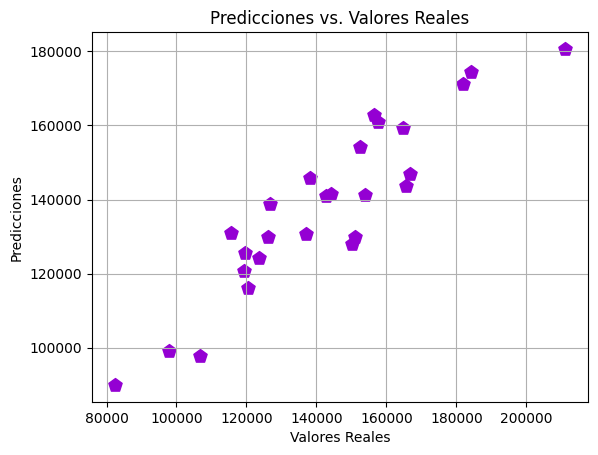

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de dispersión de las predicciones vs. valores reales
plt.scatter(y_test, y_pred, color= 'darkviolet', marker= 'p', s= 100)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.grid()
plt.show()

In [ ]:
# Creación de DataFrame con las características asignadas
# Tamaño: 2000 pies cuadrados
# Habitaciones: 3
# Baños: 2
PrecioCasa = pd.DataFrame({
    'Home': [128],         # Número de casa
    'SqFt': [2000],        # Tamaño pies cuadrados
    'Bedrooms': [3],       # Habitaciones
    'Bathrooms': [2],      # Número de baños
    'Offers': [1],         # Ofertas
    'Brick': ['Yes'],          # Construida en ladrillo
    'Neighborhood': ['North']    # Aplicación de barrio
})

# Realizar la predicción con el modelo entrenado
prediccion_precio = model_pipeline.predict(PrecioCasa)

print(f'El precio predicho para la casa es: {prediccion_precio[0]}')

El precio predicho para la casa es: 152402.07455112907
